DS GA 1007 Final Project

In [504]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from scipy import stats
from statistics import median
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import norm
'''from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree'''

'from sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier, plot_tree'

### Join bat tracking datasets across years

In [505]:
bat_df_2025 = pd.read_csv('bat_tracking_2025.csv')
bat_df_2025['year'] = 2025
bat_df_2024 = pd.read_csv('bat_tracking_2024.csv')
bat_df_2024['year'] = 2024
bat_df_2023 = pd.read_csv('bat_tracking_2023.csv')
bat_df_2023['year'] = 2023
bat_df_full = pd.concat([bat_df_2025, bat_df_2024, bat_df_2023], ignore_index=True)
bat_df_full.dropna(inplace=True, subset=['avg_bat_speed'])
bat_df_full

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing,year
0,519317,"Stanton, Giancarlo",448,0.906883,283,80.620201,0.973214,0.300353,0.189732,0.261484,0.165179,8.788955,4,9.010466,165,0.368304,141,0.314732,2025
1,665833,"Cruz, Oneil",822,0.906284,556,78.806448,0.784672,0.321942,0.217762,0.248201,0.167883,7.761988,19,-21.768531,266,0.323601,273,0.332117,2025
2,691406,"Caminero, Junior",1102,0.906996,851,78.584841,0.813067,0.289072,0.223230,0.222092,0.171506,8.420028,21,1.971819,251,0.227768,432,0.392015,2025
3,656180,"Adams, Riley",500,0.904159,341,78.304560,0.792000,0.234604,0.160000,0.181818,0.124000,7.851963,14,-22.656646,159,0.318000,148,0.296000,2025
4,691023,"Walker, Jordan",686,0.905013,465,78.069258,0.778426,0.266667,0.180758,0.200000,0.135569,8.258906,21,-19.146943,221,0.322157,231,0.336735,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,669364,"Edwards, Xavier",97,0.898148,76,64.026054,0.010309,0.342105,0.268041,0.026316,0.020619,6.211680,4,-6.257673,21,0.216495,37,0.381443,2023
1888,650333,"Arraez, Luis",407,0.896476,374,63.837034,0.002457,0.491979,0.452088,0.072193,0.066339,5.866538,3,-7.855588,33,0.081081,210,0.515971,2023
1889,664770,"Lukes, Nathan",13,0.928571,13,63.502551,0.000000,0.076923,0.076923,0.000000,0.000000,6.011915,1,-0.437373,0,0.000000,3,0.230769,2023
1890,664670,"Lopez, Alejo",2,1.000000,2,61.909735,0.000000,0.500000,0.500000,0.000000,0.000000,5.000840,0,0.782719,0,0.000000,1,0.500000,2023


### Join sprint speed datasets across years

In [506]:
sprint_df_2025 = pd.read_csv('sprint_speed_2025.csv')
sprint_df_2025['year'] = 2025
sprint_df_2024 = pd.read_csv('sprint_speed_2024.csv')
sprint_df_2024['year'] = 2024
sprint_df_2023 = pd.read_csv('sprint_speed_2023.csv')
sprint_df_2023['year'] = 2023
sprint_df_full = pd.concat([sprint_df_2025, sprint_df_2024, sprint_df_2023], ignore_index=True)
sprint_df_full.rename(columns={'last_name, first_name': 'name', 'player_id': 'id'}, inplace=True)
sprint_df_full.dropna(inplace=True, subset=['sprint_speed'])
sprint_df_full

,name,id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed,year
0,"Turner, Trea",607208,143,PHI,SS,32,265,117.0,4.22,30.3,2025
1,"Scott II, Victor",687363,138,STL,CF,24,141,87.0,4.13,30.2,2025
2,"Witt Jr., Bobby",677951,118,KC,SS,25,245,101.0,4.15,30.2,2025
3,"Buxton, Byron",621439,142,MIN,CF,31,165,56.0,4.13,30.2,2025
4,"Hill, Derek",656537,145,CWS,CF,29,50,24.0,4.21,30.1,2025
...,...,...,...,...,...,...,...,...,...,...,...
1832,"Cabrera, Miguel",408234,116,DET,DH,40,127,NaN,5.09,23.1,2023
1833,"Aguilar, Jesús",542583,133,OAK,1B,33,27,NaN,NaN,23.0,2023
1834,"Grandal, Yasmani",518735,145,CWS,C,34,129,NaN,5.14,22.8,2023
1835,"León, Sandy",506702,140,TEX,C,34,11,NaN,NaN,22.7,2023


### Merge the datasets on player name, year, and id

In [507]:
merged_df = pd.merge(bat_df_full, sprint_df_full, on=['name', 'year', 'id'], how='inner')
merged_df.to_csv('merged_bat_sprint_data.csv', index=False)
merged_df

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,...,batted_ball_event_per_swing,year,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
0,519317,"Stanton, Giancarlo",448,0.906883,283,80.620201,0.973214,0.300353,0.189732,0.261484,...,0.314732,2025,147,NYY,DH,35,62,NaN,5.22,23.5
1,665833,"Cruz, Oneil",822,0.906284,556,78.806448,0.784672,0.321942,0.217762,0.248201,...,0.332117,2025,134,PIT,CF,26,164,42.0,4.26,29.2
2,691406,"Caminero, Junior",1102,0.906996,851,78.584841,0.813067,0.289072,0.223230,0.222092,...,0.392015,2025,139,TB,3B,21,252,NaN,4.62,26.7
3,656180,"Adams, Riley",500,0.904159,341,78.304560,0.792000,0.234604,0.160000,0.181818,...,0.296000,2025,120,WSH,C,29,79,NaN,4.58,26.6
4,691023,"Walker, Jordan",686,0.905013,465,78.069258,0.778426,0.266667,0.180758,0.200000,...,0.336735,2025,138,STL,RF,23,136,2.0,4.40,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,683021,"Stefanic, Michael",73,0.901235,69,64.524445,0.013699,0.507246,0.479452,0.043478,...,0.547945,2023,108,LAA,2B,27,31,NaN,4.62,26.0
1771,680757,"Kwan, Steven",448,0.899598,408,64.083518,0.002232,0.450980,0.410714,0.046569,...,0.508929,2023,114,CLE,LF,25,334,3.0,4.22,28.1
1772,669364,"Edwards, Xavier",97,0.898148,76,64.026054,0.010309,0.342105,0.268041,0.026316,...,0.381443,2023,146,MIA,2B,23,37,3.0,4.18,28.2
1773,650333,"Arraez, Luis",407,0.896476,374,63.837034,0.002457,0.491979,0.452088,0.072193,...,0.515971,2023,146,MIA,2B,26,269,NaN,4.57,26.1


# Basic data exploration

In [508]:
merged_df['avg_bat_speed'].describe()

count    1775.000000
mean       71.217709
std         2.730330
min        62.648735
25%        69.375795
50%        71.236619
75%        73.081645
max        81.219837
Name: avg_bat_speed, dtype: float64

In [509]:
merged_df['sprint_speed'].describe()

count    1775.000000
mean       27.304338
std         1.383352
min        21.700000
25%        26.400000
50%        27.400000
75%        28.300000
max        30.500000
Name: sprint_speed, dtype: float64

### Graphing raw distributions of bat and sprint speeds

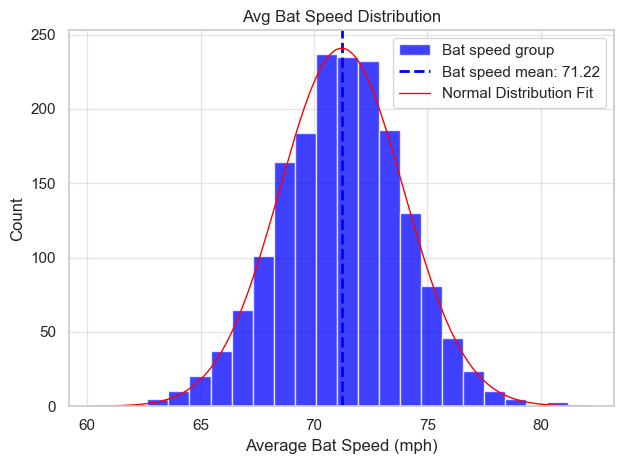

In [510]:
fig, ax = plt.subplots()
bat_speeds = merged_df['avg_bat_speed']
bat_speed_mean = bat_speeds.mean()
bins = 20

ax.hist(bat_speeds, bins=bins, alpha=0.75, color='blue', label='Bat speed group', edgecolor='white')
ax.axvline(bat_speed_mean, color='blue', linestyle='--', linewidth=2, label=f'Bat speed mean: {bat_speed_mean:.2f}')
x = np.linspace(bat_speed_mean - 4 * bat_speeds.std(), bat_speed_mean + 4 * bat_speeds.std(), 1000)
y = norm.pdf(x, bat_speed_mean, bat_speeds.std()) * len(bat_speeds) * (bat_speeds.max() - bat_speeds.min()) / bins
ax.plot(x, y, color='red', linewidth=1, label='Normal Distribution Fit')

ax.set_title('Avg Bat Speed Distribution')
ax.set_xlabel('Average Bat Speed (mph)')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

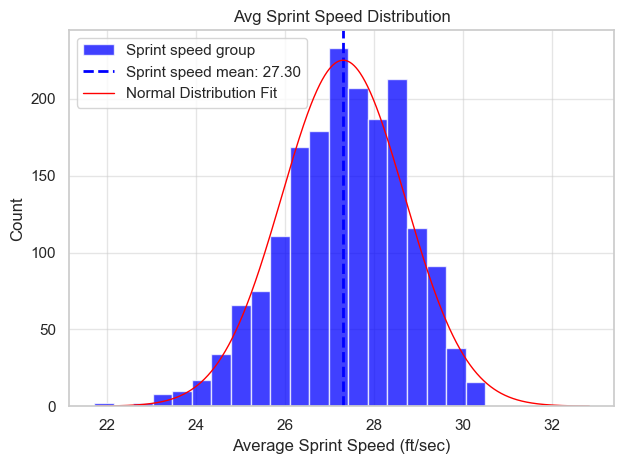

In [511]:
fig, ax = plt.subplots()
sprint_speeds = merged_df['sprint_speed']
sprint_speed_mean = sprint_speeds.mean()
bins = 20
ax.hist(sprint_speeds, bins=bins, alpha=0.75, color='blue', label='Sprint speed group', edgecolor='white')
ax.axvline(sprint_speed_mean, color='blue', linestyle='--', linewidth=2, label=f'Sprint speed mean: {sprint_speed_mean:.2f}')

x = np.linspace(sprint_speed_mean - 4 * sprint_speeds.std(), sprint_speed_mean + 4 * sprint_speeds.std(), 1000)
y = norm.pdf(x, sprint_speed_mean, sprint_speeds.std()) * len(sprint_speeds) * (sprint_speeds.max() - sprint_speeds.min()) / bins
ax.plot(x, y, color='red', linewidth=1, label='Normal Distribution Fit')

ax.set_title('Avg Sprint Speed Distribution')
ax.set_xlabel('Average Sprint Speed (ft/sec)')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Simple Linear Regression

In [512]:
bat_speed_data = merged_df['avg_bat_speed'].to_numpy()
sprint_speed_data = merged_df['sprint_speed'].to_numpy().reshape(-1, 1)
model = LinearRegression()
model.fit(sprint_speed_data, bat_speed_data)
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Coefficient (slope): 0.12
Intercept: 68.02


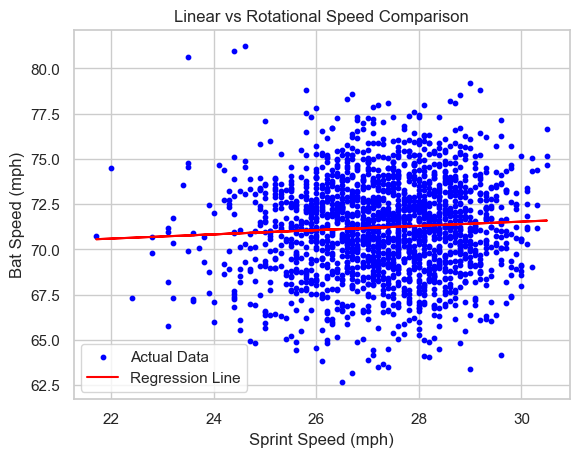

In [513]:
predictions = model.predict(sprint_speed_data)
plt.scatter(merged_df['sprint_speed'], merged_df['avg_bat_speed'], color='blue', label='Actual Data', s=10)
plt.plot(sprint_speed_data, predictions, color='red', label='Regression Line')
plt.xlabel('Sprint Speed (mph)')
plt.ylabel('Bat Speed (mph)')
plt.title('Linear vs Rotational Speed Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Test again on batters with a reliable number of attempts

In [514]:
filtered_df = merged_df[(merged_df['swings_competitive'] > 200) & (merged_df['competitive_runs'] > 100)]
print(f'Filtered results: {filtered_df.shape[0]}')

Filtered results: 805


In [515]:
filtered_bat_speed_data = filtered_df['avg_bat_speed'].to_numpy()
filtered_sprint_speed_data = filtered_df['sprint_speed'].to_numpy().reshape(-1, 1)
model = LinearRegression()
model.fit(filtered_sprint_speed_data, filtered_bat_speed_data)
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Coefficient (slope): 0.05
Intercept: 70.08


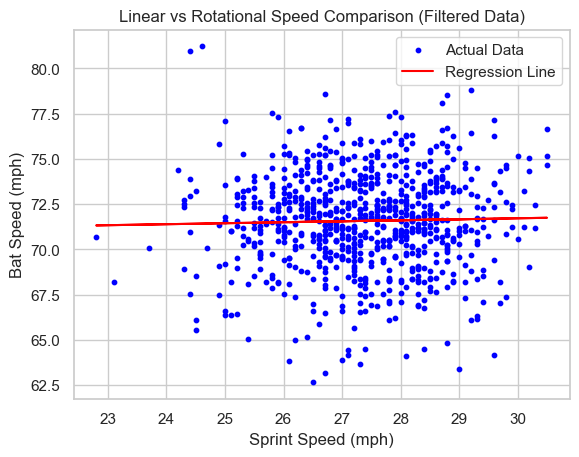

In [516]:
predictions = model.predict(filtered_sprint_speed_data)
plt.scatter(filtered_df['sprint_speed'], filtered_df['avg_bat_speed'], color='blue', label='Actual Data', s=10)
plt.plot(filtered_sprint_speed_data, predictions, color='red', label='Regression Line')
plt.xlabel('Sprint Speed (mph)')
plt.ylabel('Bat Speed (mph)')
plt.title('Linear vs Rotational Speed Comparison (Filtered Data)')
plt.legend()
plt.grid(True)
plt.show()

# T-test on Fast/Slow split

In [517]:
median_sprint_speed = median(sprint_speed_data)[0]
fast_df = merged_df[merged_df['sprint_speed'] >= median_sprint_speed]
slow_df = merged_df[merged_df['sprint_speed'] < median_sprint_speed]
t_statistic, p_value = stats.ttest_ind(fast_df['avg_bat_speed'], slow_df['avg_bat_speed'], equal_var=True)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.3895
P-value: 0.1649


### Graphing overlapping histograms to show means and distributions

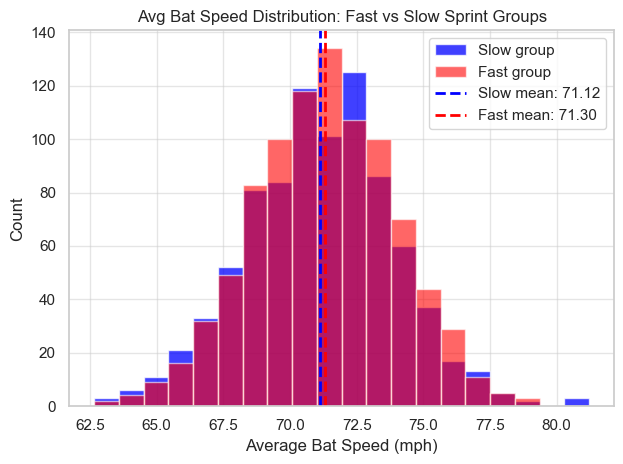

In [518]:
fig, ax = plt.subplots()
fast_speeds = fast_df['avg_bat_speed'].dropna()
slow_speeds = slow_df['avg_bat_speed'].dropna()

fast_mean = fast_speeds.mean() if len(fast_speeds) else np.nan
slow_mean = slow_speeds.mean() if len(slow_speeds) else np.nan

combined_data = pd.concat([fast_speeds, slow_speeds])
bins = 20 if combined_data.empty else np.linspace(combined_data.min(), combined_data.max(), 21)

ax.hist(slow_speeds, bins=bins, alpha=0.75, color='blue', label='Slow group', edgecolor='white')
ax.hist(fast_speeds, bins=bins, alpha=0.6, color='red', label='Fast group', edgecolor='white')

ax.axvline(slow_mean, color='blue', linestyle='--', linewidth=2, label=f'Slow mean: {slow_mean:.2f}')
ax.axvline(fast_mean, color='red', linestyle='--', linewidth=2, label=f'Fast mean: {fast_mean:.2f}')

ax.set_title('Avg Bat Speed Distribution: Fast vs Slow Sprint Groups')
ax.set_xlabel('Average Bat Speed (mph)')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# T-test on 75/25 Fast/Slow split

In [519]:
_75th_percentile_sprint_speed = np.percentile(sprint_speed_data, 75)
fast_25_df = merged_df[merged_df['sprint_speed'] >= _75th_percentile_sprint_speed]
slow_75_df = merged_df[merged_df['sprint_speed'] < _75th_percentile_sprint_speed]
t_statistic, p_value = stats.ttest_ind(fast_25_df['avg_bat_speed'], slow_75_df['avg_bat_speed'], equal_var=True)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.1310
P-value: 0.2582


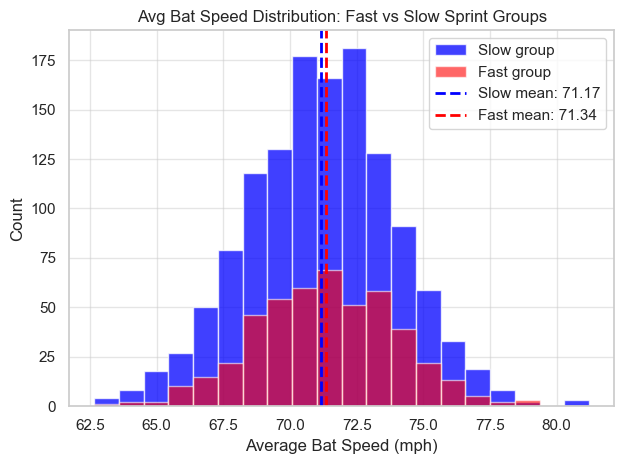

In [520]:
fig, ax = plt.subplots()
fast_25_speeds = fast_25_df['avg_bat_speed'].dropna()
slow_75_speeds = slow_75_df['avg_bat_speed'].dropna()

fast_25_mean = fast_25_speeds.mean() if len(fast_25_speeds) else np.nan
slow_75_mean = slow_75_speeds.mean() if len(slow_75_speeds) else np.nan

combined_data = pd.concat([fast_25_speeds, slow_75_speeds])
bins = 20 if combined_data.empty else np.linspace(combined_data.min(), combined_data.max(), 21)

ax.hist(slow_75_speeds, bins=bins, alpha=0.75, color='blue', label='Slow group', edgecolor='white')
ax.hist(fast_25_speeds, bins=bins, alpha=0.6, color='red', label='Fast group', edgecolor='white')

ax.axvline(slow_75_mean, color='blue', linestyle='--', linewidth=2, label=f'Slow mean: {slow_75_mean:.2f}')
ax.axvline(fast_25_mean, color='red', linestyle='--', linewidth=2, label=f'Fast mean: {fast_25_mean:.2f}')

ax.set_title('Avg Bat Speed Distribution: Fast vs Slow Sprint Groups')
ax.set_xlabel('Average Bat Speed (mph)')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Normalize the data for clearer distribution comparisons

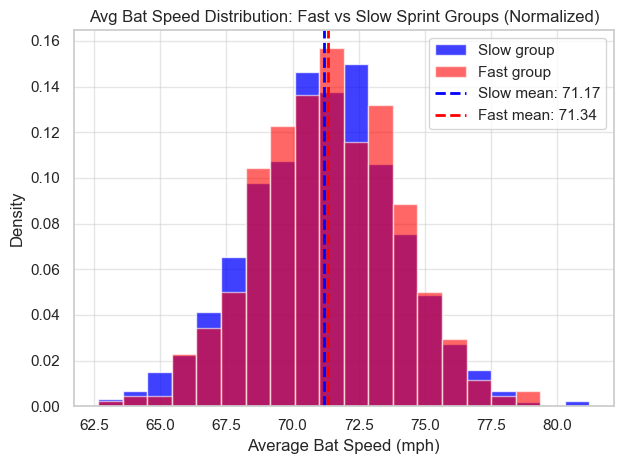

In [521]:
fig, ax = plt.subplots()
ax.hist(slow_75_speeds, bins=bins, alpha=0.75, color='blue', label='Slow group', edgecolor='white', density=True)
ax.hist(fast_25_speeds, bins=bins, alpha=0.6, color='red', label='Fast group', edgecolor='white', density=True)

ax.axvline(slow_75_mean, color='blue', linestyle='--', linewidth=2, label=f'Slow mean: {slow_75_mean:.2f}')
ax.axvline(fast_25_mean, color='red', linestyle='--', linewidth=2, label=f'Fast mean: {fast_25_mean:.2f}')

ax.set_title('Avg Bat Speed Distribution: Fast vs Slow Sprint Groups (Normalized)')
ax.set_xlabel('Average Bat Speed (mph)')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Correlation by age

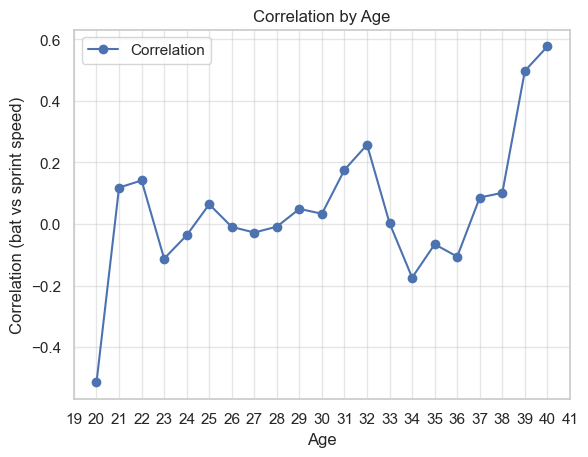

In [522]:
correlations = (
    merged_df
    .dropna(subset=['avg_bat_speed', 'sprint_speed', 'age'])
    .groupby('age')[['avg_bat_speed', 'sprint_speed']]
    .corr()
)
age_correlations = (
    correlations
    .xs('avg_bat_speed', level=1)['sprint_speed']
    .reset_index(name='corr')
)
plt.figure()
plt.plot(age_correlations['age'], age_correlations['corr'], marker='o')
plt.xticks(np.arange(age_correlations['age'].min(), age_correlations['age'].max()+1, 1))
plt.xlabel('Age')
plt.ylabel('Correlation (bat vs sprint speed)')
plt.title('Correlation by Age')
plt.grid(True, alpha=0.5)
plt.legend(['Correlation'], loc='upper left')
plt.show()

### Run Ordinary Least Squares

In [523]:
df = merged_df.dropna(subset=['avg_bat_speed', 'sprint_speed', 'age']).copy()
model = smf.ols('avg_bat_speed ~ sprint_speed * age', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_bat_speed   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.181
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           5.00e-06
Time:                        14:00:21   Log-Likelihood:                -4287.3
No. Observations:                1775   AIC:                             8583.
Df Residuals:                    1771   BIC:                             8604.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           74.6216      9.239  

### Visualize fitted slope vs age

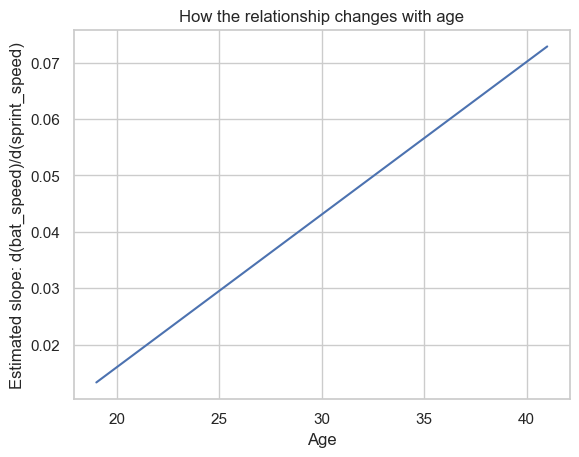

In [524]:
ages = np.linspace(df['age'].min(), df['age'].max(), 50)
slope_vs_age = model.params['sprint_speed'] + model.params['sprint_speed:age'] * ages
plt.figure()
plt.plot(ages, slope_vs_age)
plt.xlabel('Age')
plt.ylabel('Estimated slope: d(bat_speed)/d(sprint_speed)')
plt.title('How the relationship changes with age')
plt.grid(True)
plt.show()

The hypothesis that "The link between athleticism and bat speed changes as players age" is false according to this data. \
Huge P-value 0.786 \
0.015 R^2

### Correlation by binned age

In [525]:
bins = [18, 24, 27, 30, 35, 45]
age_df = merged_df.dropna(subset=['avg_bat_speed', 'sprint_speed', 'age']).copy()
age_df['age_bin'] = pd.cut(age_df['age'], bins=bins)

# Function to calculate slope for a group of players
def get_group_slope(group):
    if len(group) < 10:
        print(f"Not enough data in {group} for reliable slope calculation.")
        return np.nan
    X = sm.add_constant(group['sprint_speed'])
    y = group['avg_bat_speed']
    model = sm.OLS(y, X).fit()
    return model.params['sprint_speed']

bin_slopes = age_df.groupby('age_bin', observed=False).apply(get_group_slope, include_groups=False)

print("Slopes by Age Group:")
print(bin_slopes)

Slopes by Age Group:
age_bin
(18, 24]   -0.046576
(24, 27]    0.024829
(27, 30]    0.036311
(30, 35]    0.185461
(35, 45]    0.203777
dtype: float64


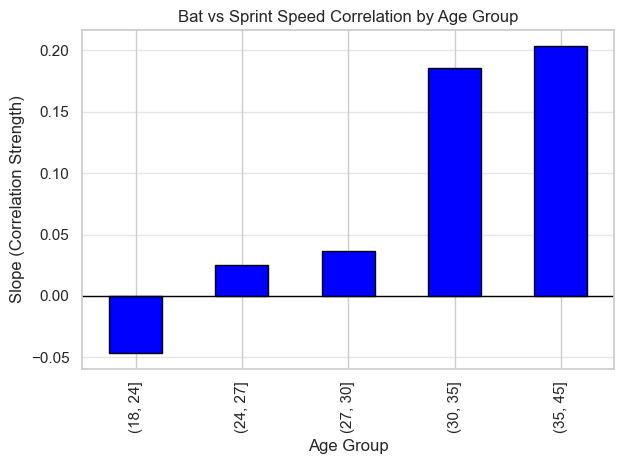

In [526]:
plt.figure()
bin_slopes.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Slope (Correlation Strength)')
plt.title('Bat vs Sprint Speed Correlation by Age Group')
plt.axhline(0, color='black', linewidth=1)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Slight correlation increase with age, but data becomes more variable with less observations and 0.2 is still fairly low. Supports the previous 2 graphs' findings

### Graphing bat and sprint speed aging curves

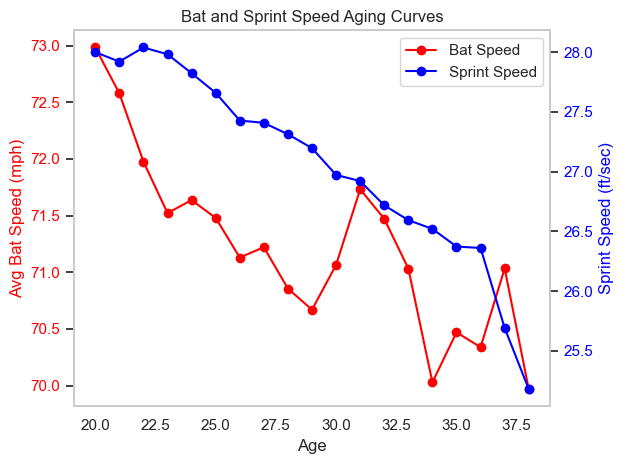

In [527]:
age_df = merged_df.dropna(subset=['avg_bat_speed', 'sprint_speed', 'age']).copy()

age_groups = age_df.groupby('age')[['avg_bat_speed', 'sprint_speed', 'name']].agg(
    avg_bat_speed=('avg_bat_speed', 'mean'),
    avg_sprint_speed=('sprint_speed', 'mean'),
    player_count=('name', 'count')
)
age_groups = age_groups[age_groups['player_count'] >= 5]

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Age')
ax1.set_ylabel('Avg Bat Speed (mph)', color=color)
l1, = ax1.plot(age_groups.index, age_groups['avg_bat_speed'], color=color, marker='o', label='Bat Speed')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()  
color = 'blue'
ax2.set_ylabel('Sprint Speed (ft/sec)', color=color)  
l2, = ax2.plot(age_groups.index, age_groups['avg_sprint_speed'], color=color, marker='o', label='Sprint Speed')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

lines = [l1, l2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Bat and Sprint Speed Aging Curves')
fig.tight_layout()  
plt.show()

# Linear Regression on each position

In [528]:
if merged_df is None:
    merged_df = pd.read_csv('merged_bat_sprint_data.csv')

valid_positions = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH']

position_analysis_df = merged_df[merged_df['position'].isin(valid_positions)].copy()
position_analysis_df = position_analysis_df.dropna(subset=['avg_bat_speed', 'sprint_speed', 'position'])


### Graphing

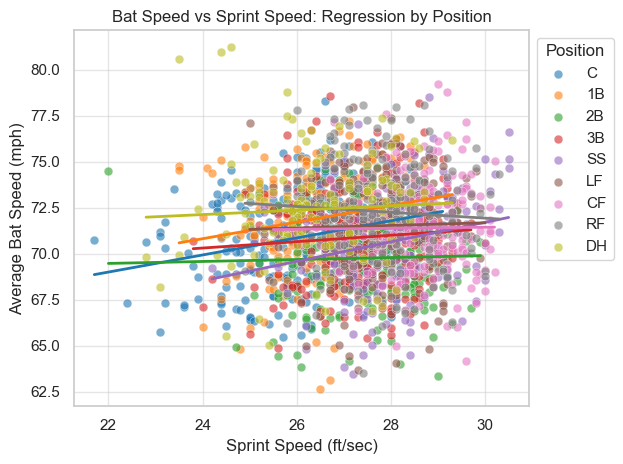

  Position  Slope  Intercept  Correlation  Count
0        C   0.46      58.79         0.25    251
4       SS   0.53      55.82         0.23    175
1       1B   0.45      59.99         0.19    168
3       3B   0.17      66.15         0.07    224
7       RF  -0.16      76.70        -0.06    201
8       DH   0.12      69.29         0.05    136
2       2B   0.05      68.31         0.03    216
5       LF   0.07      69.55         0.03    198
6       CF   0.03      70.60         0.01    199


In [529]:
plt.figure()

scatter_handles = []
line_handles = [] 
results = []
cmap = plt.get_cmap('tab10') 
for i, position in enumerate(valid_positions):
    indiv_position_df = position_analysis_df[position_analysis_df['position'] == position]
    if len(indiv_position_df) < 5:
        continue
    color = cmap(i)
        
    plt.scatter(
        indiv_position_df['sprint_speed'],
        indiv_position_df['avg_bat_speed'],
        color=color,
        alpha=0.6,
        edgecolor='white',
        linewidth=0.4,
        s=40,
        label=f'{position}'
    )

    X = indiv_position_df['sprint_speed'].to_numpy().reshape(-1, 1)
    y = indiv_position_df['avg_bat_speed'].to_numpy()
    reg = LinearRegression().fit(X, y)
    
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = reg.predict(x_range)
    line, = plt.plot(x_range, y_pred, color=color, linewidth=2)

    corr = np.corrcoef(indiv_position_df['sprint_speed'], indiv_position_df['avg_bat_speed'])[0,1]
    results.append({
        'Position': position,
        'Slope': reg.coef_[0], 
        'Intercept': reg.intercept_, 
        'Correlation': corr, 
        'Count': len(indiv_position_df)
    })
    plt.legend(title='Position', bbox_to_anchor=(1, 1))
plt.xlabel('Sprint Speed (ft/sec)')
plt.ylabel('Average Bat Speed (mph)')
plt.title('Bat Speed vs Sprint Speed: Regression by Position')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

position_correlation_df = pd.DataFrame(results)
position_correlation_df = position_correlation_df.reindex(position_correlation_df['Correlation'].abs().sort_values(ascending=False).index)

print(position_correlation_df.round(2))

# Things to check before it's due

add try and excepts for dataset I guess \
clean up variable names for clarity
